In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pas temporel

In [2]:
x= np.linspace(0,50,501)

In [ ]:
x

In [4]:
y = np.sin(x)

In [ ]:
y

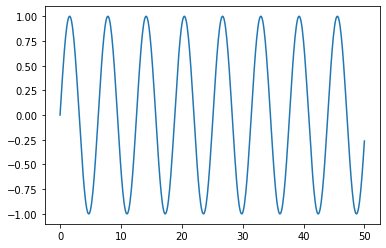

In [6]:
plt.plot(x,y)

In [8]:
df = pd.DataFrame(data = y, index=x, columns=['sinus'])

In [9]:
df

,sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


repartition entrainement test

In [10]:
len(df)

501

on veut donc que 10% des valeurs appartiennent au set de test, ce qui represente 50 valeurs

In [13]:
test_percent = 0.1
len(df)* test_percent
test_point = np.round(len(df)*test_percent)#on arrondi

In [14]:
test_point

50.0

In [15]:
test_index = int(len(df) - test_point)

point de coupure entre entrainnement et test 

In [17]:
test_index

451

In [18]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

mise a l'echelle des données 

In [20]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()


In [21]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)

In [23]:
scaled_test = scaler.transform(test)

creaion des batchs

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [57]:
len(scaled_train)


451

In [58]:
len(generator)

142

In [59]:
x,y = generator[0]

In [ ]:
x


In [61]:
y

array([[0.79923759],
       [0.75775187],
       [0.71369077]])

In [ ]:
scaled_train

In [ ]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [63]:
from tensorflow.keras.models import Sequential

In [64]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [67]:
n_features = 1 #nombre de données pour predire 

In [68]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(generator,epochs=5)

Epoch 1/5
426/426 [==============================] - 2s 4ms/step - loss: 0.0160
Epoch 2/5
426/426 [==============================] - 2s 4ms/step - loss: 2.0718e-04
Epoch 3/5
426/426 [==============================] - 2s 4ms/step - loss: 2.8985e-04
Epoch 4/5
426/426 [==============================] - 1s 3ms/step - loss: 2.0709e-04
Epoch 5/5
426/426 [==============================] - 2s 4ms/step - loss: 8.5534e-05


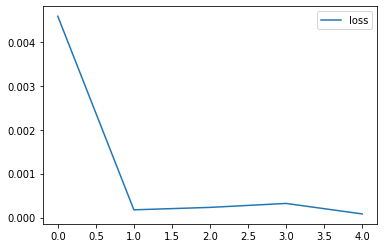

In [73]:
losses = pd.DataFrame(model.history.history)
losses.plot()

on prend les dernieres valeurs de notre dataframe, on va utiliser ces valeurs pour predire la premiere du set de test 

In [75]:
first_eval_batch = scaled_train[-length:]

on reshape ce batch pour pouvoir le donner a notre modele

In [78]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

On effectue notre premiere prediciton :

In [81]:
model.predict(first_eval_batch)

array([[0.9524369]], dtype=float32)

On va maintenant cmomparer cette prediction avec la premiere valeur de notre set de test 

In [82]:
scaled_test[0]

array([0.94955134])

Maintenant on va repliquer cette logique et creer des batch de taille = 50, qui vont eliminer le dernier element du batch et incorporer la prediction

In [84]:
test_prediction = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
predicted_value= [[[99]]]
np.append(current_batch[:,1:,:],[[[99]]], axis=1)

In [86]:
test_prediction = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range (len(test)) :
  current_pred = model.predict(current_batch)[0]  
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


In [87]:
test_prediction

[array([0.9524369], dtype=float32),
 array([0.972755], dtype=float32),
 array([0.9882834], dtype=float32),
 array([0.9992726], dtype=float32),
 array([1.0043952], dtype=float32),
 array([1.0052612], dtype=float32),
 array([1.000803], dtype=float32),
 array([0.99108773], dtype=float32),
 array([0.97730106], dtype=float32),
 array([0.95846194], dtype=float32),
 array([0.9355931], dtype=float32),
 array([0.90894896], dtype=float32),
 array([0.8784063], dtype=float32),
 array([0.8447611], dtype=float32),
 array([0.8084914], dtype=float32),
 array([0.76927364], dtype=float32),
 array([0.72816443], dtype=float32),
 array([0.6852554], dtype=float32),
 array([0.640903], dtype=float32),
 array([0.5956312], dtype=float32),
 array([0.5498159], dtype=float32),
 array([0.5036511], dtype=float32),
 array([0.45788807], dtype=float32),
 array([0.41260397], dtype=float32),
 array([0.36842123], dtype=float32),
 array([0.3256344], dtype=float32),
 array([0.28454417], dtype=float32),
 array([0.24563436], 

In [88]:
scaled_test


array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [89]:
true_predictions = scaler.inverse_transform(test_prediction)

In [90]:
true_predictions

array([[ 0.90486835],
       [ 0.94550421],
       [ 0.97656072],
       [ 0.99853892],
       [ 1.00878417],
       [ 1.01051602],
       [ 1.00159972],
       [ 0.98216936],
       [ 0.95459623],
       [ 0.91691829],
       [ 0.87118103],
       [ 0.81789312],
       [ 0.75680827],
       [ 0.68951838],
       [ 0.61697963],
       [ 0.53854472],
       [ 0.45632697],
       [ 0.37050961],
       [ 0.2818055 ],
       [ 0.1912626 ],
       [ 0.09963275],
       [ 0.00730387],
       [-0.08422142],
       [-0.17478888],
       [-0.26315367],
       [-0.34872665],
       [-0.43090643],
       [-0.50872542],
       [-0.58150524],
       [-0.64890694],
       [-0.70992811],
       [-0.76436391],
       [-0.81151203],
       [-0.85114594],
       [-0.88275426],
       [-0.9063358 ],
       [-0.92159635],
       [-0.92855972],
       [-0.92718077],
       [-0.9177421 ],
       [-0.90010821],
       [-0.87472824],
       [-0.84155828],
       [-0.80097049],
       [-0.75309011],
       [-0

In [91]:
test['Pred'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


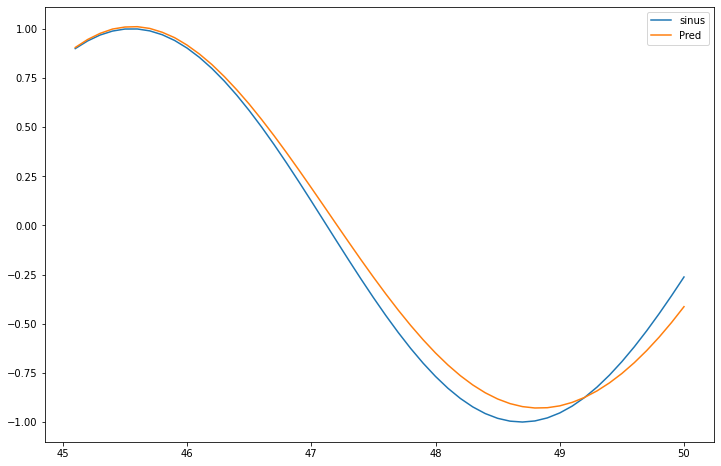

In [96]:
test.plot(figsize=(12,8))

In [97]:
from tensorflow.keras.callbacks import EarlyStopping

In [98]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [102]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                           length=length, batch_size=1)

In [103]:
model = Sequential()
model.add(LSTM(50,input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [104]:
model.fit(generator, epochs=20, validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
426/426 [==============================] - 5s 9ms/step - loss: 0.0161 - val_loss: 1.4159e-05
Epoch 2/20
426/426 [==============================] - 3s 8ms/step - loss: 7.9069e-05 - val_loss: 1.9431e-04
Epoch 3/20
426/426 [==============================] - 3s 8ms/step - loss: 7.3205e-05 - val_loss: 3.1786e-06
Epoch 4/20
426/426 [==============================] - 4s 9ms/step - loss: 3.1132e-04 - val_loss: 1.7213e-04
Epoch 5/20
426/426 [==============================] - 3s 8ms/step - loss: 3.5430e-05 - val_loss: 4.2561e-04


In [105]:
test_prediction = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range (len(test)) :
  current_pred = model.predict(current_batch)[0]  
  test_prediction.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [106]:
true_predictions= scaler.inverse_transform(test_prediction)

In [107]:
test['LSTM Pred'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


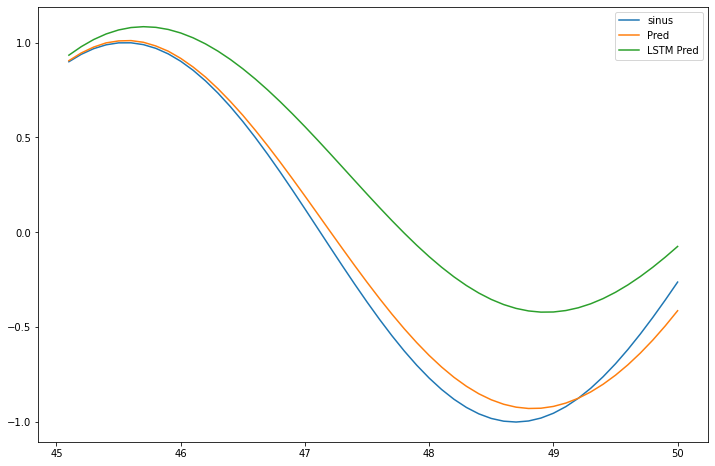

In [108]:
test.plot(figsize=(12,8))

In [109]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [110]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [111]:
model = Sequential()
model.add(LSTM(50,input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [112]:
model.fit(generator, epochs=5)

Epoch 1/5
452/452 [==============================] - 10s 18ms/step - loss: 0.0728
Epoch 2/5
452/452 [==============================] - 8s 17ms/step - loss: 7.5702e-05
Epoch 3/5
452/452 [==============================] - 7s 15ms/step - loss: 2.3857e-04
Epoch 4/5
452/452 [==============================] - 6s 13ms/step - loss: 7.1268e-04
Epoch 5/5
452/452 [==============================] - 6s 13ms/step - loss: 4.9733e-05


In [113]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range (25) :
  current_pred = model.predict(current_batch)[0]  
  forecast.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [114]:
df

,sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [115]:
forecast = full_scaler.inverse_transform(forecast)

In [116]:
forecast

array([[ 0.93415105],
       [ 0.9752325 ],
       [ 1.008448  ],
       [ 1.03302709],
       [ 1.04859856],
       [ 1.0550091 ],
       [ 1.05227852],
       [ 1.04055605],
       [ 1.02008941],
       [ 0.99120022],
       [ 0.95426757],
       [ 0.90971274],
       [ 0.85799075],
       [ 0.79958284],
       [ 0.73499493],
       [ 0.66475714],
       [ 0.58942284],
       [ 0.50957173],
       [ 0.42581322],
       [ 0.33878708],
       [ 0.24916864],
       [ 0.15766909],
       [ 0.06503802],
       [-0.02793703],
       [-0.12043131]])

In [117]:
25*0.1

2.5

In [119]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [ ]:
help(np.arange)

In [123]:
len(forecast_index)

25

In [125]:
len(forecast)

25

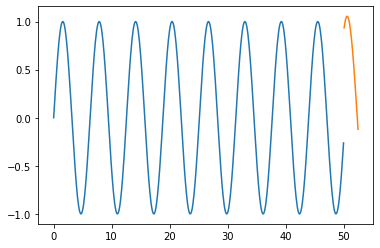

In [129]:
plt.plot(df.index, df['sinus'])
plt.plot(forecast_index, forecast)